In [ ]:
# https://www.kaggle.com/datasets/mosapabdelghany/telcom-customer-churn-dataset

--- Step 1: Loading Data ---

--- Step 2: Basic EDA and Visualizations ---
Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 


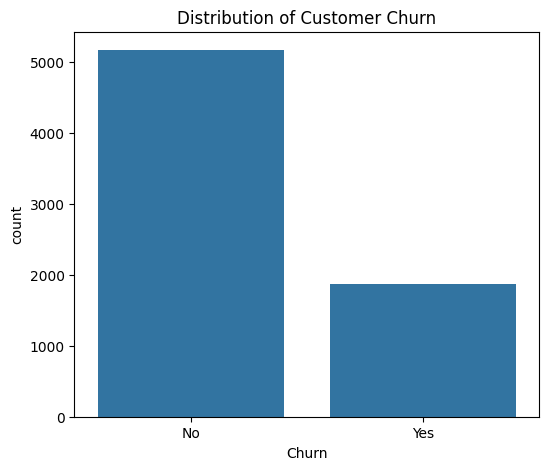

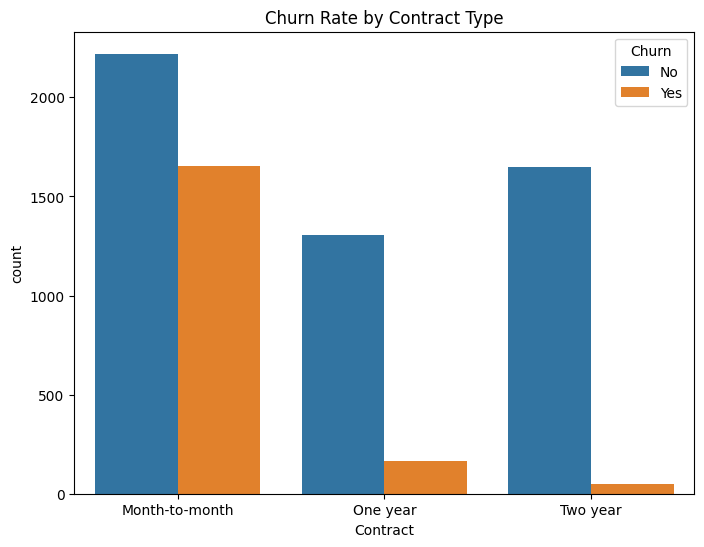

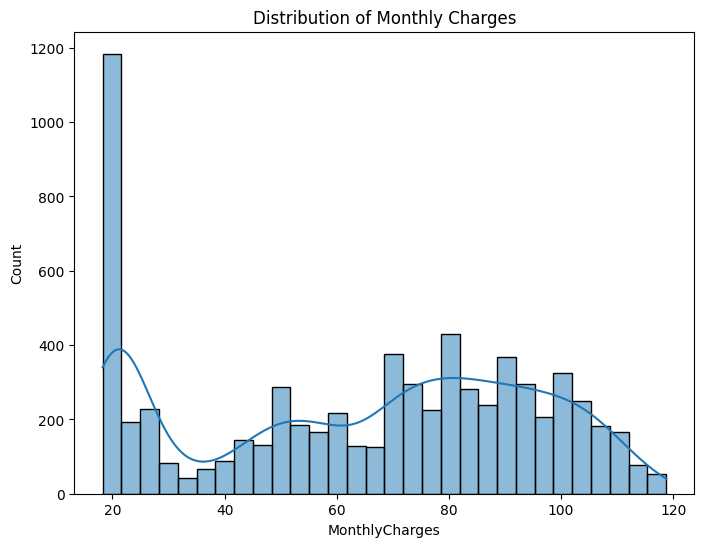

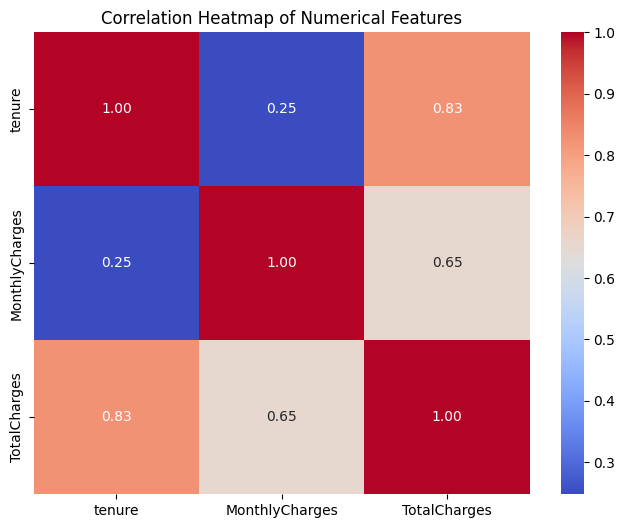


--- Step 3: Data Preprocessing for ANN ---
Data preprocessing complete. Starting model training...
--------------------------------------------------

--- Model 1: Simple (1 Hidden Layer, 8 Neurons) with patience=3 ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6685 - loss: 0.5799 - val_accuracy: 0.7621 - val_loss: 0.4565
Epoch 2/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7825 - loss: 0.4530 - val_accuracy: 0.7924 - val_loss: 0.4259
Epoch 3/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7917 - loss: 0.4339 - val_accuracy: 0.8009 - val_loss: 0.4164
Epoch 4/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7950 - loss: 0.4287 - val_accuracy: 0.8076 - val_loss: 0.4128
Epoch 5/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7944 - loss: 0.4264 - val_accuracy: 0.8076 - val_loss: 0.4111
Epoch 6/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7946 - loss: 0.4249 - val_accuracy: 0.8104 - val_loss: 0.4103
Epoch 7/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7962 - loss: 0.4237 - val_accuracy: 0.8133 - val_loss: 0.4097
Epoch 8/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7968 - loss: 0.4226 - val_acc

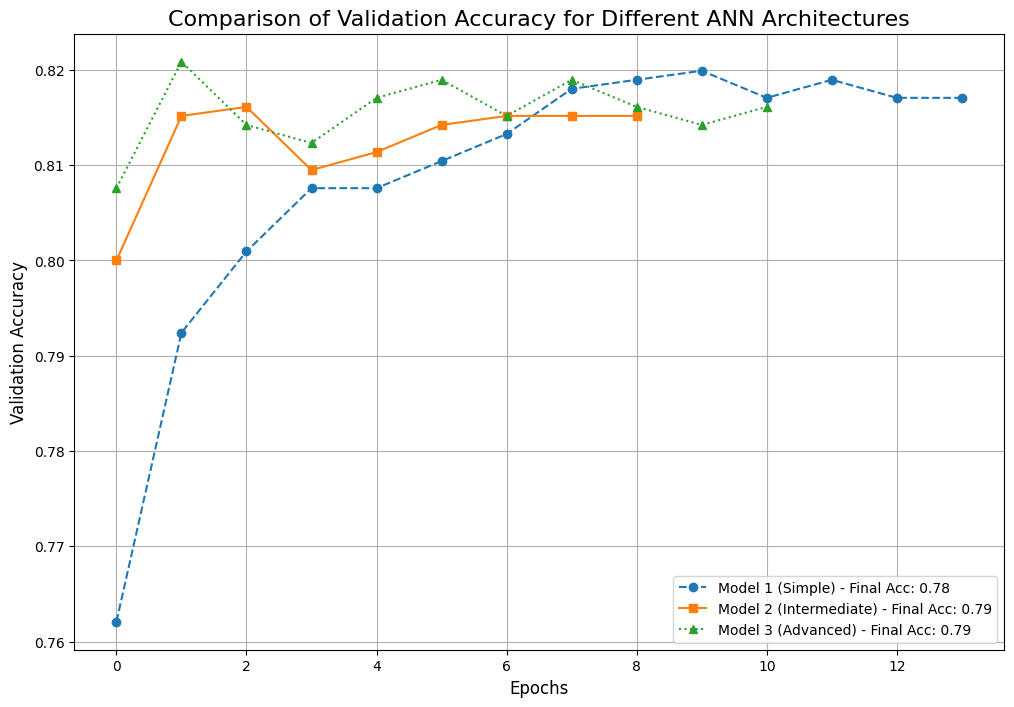

Comparison graph has been generated.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Ensure consistent results
tf.random.set_seed(42)

# --- Step 1: Data Loading ---
print("--- Step 1: Loading Data ---")
try:
    df = pd.read_csv('/content/Telco_Cusomer_Churn.csv')
except FileNotFoundError:
    print("Error: Dataset file not found. Please ensure 'WA_Fn-UseC_-Telco-Customer-Churn.csv' is in the same directory.")
    exit()

# --- Step 2: Exploratory Data Analysis (EDA) and Visualizations ---
print("\n--- Step 2: Basic EDA and Visualizations ---")
print("Initial Data Info:")
df.info()
print("\nDescriptive Statistics for Numerical Features:")
print(df.describe())

# A. Churn Distribution
plt.figure(figsize=(6, 5))
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Customer Churn')
plt.show()

# B. Churn by Contract Type
plt.figure(figsize=(8, 6))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn Rate by Contract Type')
plt.show()

# C. Distribution of Monthly Charges
plt.figure(figsize=(8, 6))
sns.histplot(df['MonthlyCharges'], bins=30, kde=True)
plt.title('Distribution of Monthly Charges')
plt.show()

# D. Correlation Heatmap
numerical_features_to_plot = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_corr = df[numerical_features_to_plot].copy()
df_corr['TotalCharges'] = pd.to_numeric(df_corr['TotalCharges'], errors='coerce')
corr_matrix = df_corr.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# --- Step 3: Data Preprocessing for ANN ---
print("\n--- Step 3: Data Preprocessing for ANN ---")

# Handle TotalCharges (convert to numeric and drop missing rows)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

# Separate features (X) and target (y)
X = df.drop(columns=['Churn', 'customerID'])
y = df['Churn'].map({'Yes': 1, 'No': 0})

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

# Create preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Fit and transform the data
X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)
X_test_processed = preprocessor.transform(X_test)
input_shape = X_train_processed.shape[1]

print("Data preprocessing complete. Starting model training...")
print("-" * 50)

# --- Step 4: Building and Training the Three Models ---

# Model 1: Simple Architecture
print("\n--- Model 1: Simple (1 Hidden Layer, 8 Neurons) with patience=3 ---")
model1 = Sequential([
    Dense(8, activation='relu', input_shape=(input_shape,)),
    Dense(1, activation='sigmoid')
])
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping1 = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history1 = model1.fit(X_train_processed, y_train,
                      epochs=100,
                      validation_data=(X_val_processed, y_val),
                      callbacks=[early_stopping1],
                      verbose=1)

# --- Model 2: Intermediate Architecture
print("\n--- Model 2: Intermediate (2 Hidden Layers, 32/16 Neurons) with patience=5 ---")
model2 = Sequential([
    Dense(32, activation='relu', input_shape=(input_shape,)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping2 = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history2 = model2.fit(X_train_processed, y_train,
                      epochs=100,
                      validation_data=(X_val_processed, y_val),
                      callbacks=[early_stopping2],
                      verbose=1)

# --- Model 3: Advanced Architecture
print("\n--- Model 3: Advanced (3 Hidden Layers, Dropout) with patience=7 ---")
model3 = Sequential([
    Dense(64, activation='relu', input_shape=(input_shape,)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping3 = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
history3 = model3.fit(X_train_processed, y_train,
                      epochs=100,
                      validation_data=(X_val_processed, y_val),
                      callbacks=[early_stopping3],
                      verbose=1)

print("-" * 50)
print("\n--- Step 5: Model Evaluation and Comparison ---")
# Evaluate each model on the test set
_, acc1 = model1.evaluate(X_test_processed, y_test, verbose=0)
_, acc2 = model2.evaluate(X_test_processed, y_test, verbose=0)
_, acc3 = model3.evaluate(X_test_processed, y_test, verbose=0)

print(f"Model 1 (Simple) Test Accuracy: {acc1:.4f}")
print(f"Model 2 (Intermediate) Test Accuracy: {acc2:.4f}")
print(f"Model 3 (Advanced) Test Accuracy: {acc3:.4f}")

# --- Step 6: Visualizing the Comparison ---
print("\n--- Step 6: Generating Comparison Graph ---")

plt.figure(figsize=(12, 8))
plt.plot(history1.history['val_accuracy'], label=f'Model 1 (Simple) - Final Acc: {acc1:.2f}', marker='o', linestyle='--')
plt.plot(history2.history['val_accuracy'], label=f'Model 2 (Intermediate) - Final Acc: {acc2:.2f}', marker='s', linestyle='-')
plt.plot(history3.history['val_accuracy'], label=f'Model 3 (Advanced) - Final Acc: {acc3:.2f}', marker='^', linestyle=':')
plt.title('Comparison of Validation Accuracy for Different ANN Architectures', fontsize=16)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Validation Accuracy', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.show()

print("Comparison graph has been generated.")